### Polymer Profiles


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mt
import scienceplots


Import custom plotting and data manipulation functions to create DISCO plots.

In [2]:
from utils.wrangle_data import generate_disco_effect_mean_diff_df, generate_subset_sattime_df 
from utils.plotting import add_fingerprint_toax, add_buildup_toax, add_difference_plot_transposed, add_overlaid_buildup_toax_customlabels, add_difference_plot
from utils.plotting_helpers import assemble_peak_buildup_df


In [3]:
# Define a custom output directory for formal figures
output_directory = "../paper/figurefiles"


Set global figure properties as desired. The colour palette in this work was selected from the Color Brewer qualitative contrast scheme. 

For more information on colour brewer see: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9

In [4]:
from matplotlib.ticker import FormatStrFormatter # set decimal places

plt.style.use(['science', 'discolib'])
plt.rc('text', usetex=True)
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.size': 6})


### PVA Interaction Profiles

In [5]:
# grab data
low_PVA = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVA86-89_105k_20uM.xlsx",
                        index_col=[0], header=[0]).reset_index(drop=True)
low_PVA_AFo = pd.read_excel("../data/raw/stats_analysis_output_replicate_PVA86-89_105k_20uM.xlsx",
                            index_col=[0], header=[0]).reset_index(drop=True)
# low_PVA_mean = pd.read_excel("../data/raw/stats_analysis_output_mean_PVA86-89_105k_20uM.xlsx",
#  index_col=[0,1,2,3], header=[0,1]).reset_index()

high_PVA = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVA99_105k_20uM.xlsx",
                         index_col=[0], header=[0]).reset_index(drop=True)
high_PVA_AFo = pd.read_excel("../data/raw/stats_analysis_output_replicate_PVA99_105k_20uM.xlsx",
                             index_col=[0], header=[0]).reset_index(drop=True)
# high_PVA_mean = pd.read_excel("../data/raw/stats_analysis_output_mean_PVA99_105k_20uM.xlsx",
#  index_col=[0,1,2,3], header=[0,1]).reset_index()

# read and prep PVA Au NP Data
low_PVA_NP = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVA8789AuNP_105k_20uM.xlsx",
                           index_col=[0], header=[0]).reset_index(drop=True)
low_PVA_AFo_NP = pd.read_excel("../data/raw/stats_analysis_output_replicate_PVA8789AuNP_105k_20uM.xlsx",
                               index_col=[0], header=[0]).reset_index(drop=True)
# low_PVA_mean_NP = pd.read_excel("../data/raw/stats_analysis_output_mean_PVA8789AuNP_105k_20uM.xlsx",
#  index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

high_PVA_NP = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVA99AuNP_105k_20uM.xlsx",
                            index_col=[0], header=[0]).reset_index(drop=True)
high_PVA_AFo_NP = pd.read_excel("../data/raw/stats_analysis_output_replicate_PVA99AuNP_105k_20uM.xlsx",
                                index_col=[0], header=[0]).reset_index(drop=True)
# high_PVA_mean_NP = pd.read_excel("../data/raw/stats_analysis_output_mean_PVA99AuNP_105k_20uM.xlsx",
#   index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()


In [6]:
# add zero data to 86-69 NPs to enable plotting its fingeprint
low_PVA_AFo_NP = low_PVA_NP.copy()
low_PVA_AFo_NP['AFo'] = 0

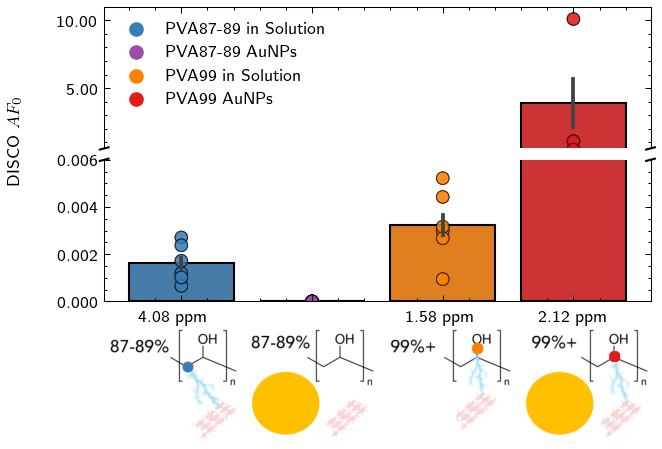

In [7]:
mosaic = """
    AAAA
    BBBB
    CDEF
    """
gs_kw = dict(width_ratios=[1,1,1,1], height_ratios=[1,1,1])
# gs_kw = dict(width_ratios = [1,0.05,1], height_ratios = [2,1,1,1,1,1,1,1,1])

PVA_interaction_df = pd.concat([low_PVA_AFo, low_PVA_AFo_NP, high_PVA_AFo, high_PVA_AFo_NP])
PVA_interaction_df['AFo'] = PVA_interaction_df['AFo'].abs()

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(4, 3),
                              constrained_layout=False, dpi=150)

# fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
# Overlay fingerprints
sns.barplot(data = PVA_interaction_df, y = "AFo", x = "polymer_name", ax = axd['A'], edgecolor='k')
sns.barplot(data = PVA_interaction_df, y = "AFo", x = "polymer_name", ax = axd['B'], edgecolor='k')
sns.scatterplot(data=PVA_interaction_df, y="AFo", x="polymer_name", ax=axd['A'], hue = 'polymer_name', edgecolor='k', alpha = 0.25, legend = False)
sns.scatterplot(data=PVA_interaction_df, y="AFo", x="polymer_name", ax=axd['B'], hue = 'polymer_name', edgecolor='k', alpha = 0.25)

#axd['B'].yaxis.set_ticks(np.arange(0.0, 0.0006, 0.0002))

axd['A'].set_ylim(0.55, 11)  # outliers only
axd['B'].set_ylim(0, 0.006)  # most of the data
axd['A'].tick_params(labelsize=8)
axd['B'].tick_params(labelsize=8)

axd['A'].yaxis.set_major_formatter(mt.FormatStrFormatter('%1.2f'))
axd['B'].yaxis.set_major_formatter(mt.FormatStrFormatter('%1.3f'))




 
# remove default axis labels
fig.text(-0.08, 0.7, 'DISCO $AF_0$', va='center', rotation='vertical',font = 'OpenSans',fontsize=8)
axd['A'].set_ylabel("") 
axd['B'].set_ylabel("")
axd['A'].set_xlabel("")
axd['B'].set_xlabel("")
axd['B'].set_xticklabels("")

# customize legend
new_labels = ['PVA87-89 in Solution', 'PVA87-89 AuNPs', 'PVA99 in Solution', 'PVA99 AuNPs']
handles, labels = axd['B'].get_legend_handles_labels()
axd['A'].legend(handles = handles, labels = new_labels, loc = 'upper left', fontsize = 8)
axd['B'].get_legend().remove()
# axd['A'].get_legend().remove()

# legend(default_labels, ['PVA86-89 in Solution', 'PVA99 in Solution', 'PVA99 AuNPs'], loc = 'upper left')

# hide the spines between ax and ax2
axd['A'].spines['bottom'].set_visible(False)
axd['B'].spines['top'].set_visible(False)
axd['A'].xaxis.tick_top()
axd['A'].tick_params(labeltop=False)  # don't put tick labels at the top
axd['B'].xaxis.tick_bottom()

d = .008  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axd['A'].transAxes, color='k', clip_on=False)
axd['A'].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axd['A'].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axd['B'].transAxes)  # switch to the bottom axes
axd['B'].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axd['B'].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# add PVA Structure
pva_structure = plt.imread("../data/external/pva_repeatunit.png", format="png")
axd['C'].imshow(plt.imread("../data/external/pva_customfigs/pva_repeatunit_low_sol.png", format="png"))
axd['C'].axis('off')
# axd['C'].xaxis.set_visible(False)
# axd['C'].yaxis.set_visible(False)
# axd['C'].set_xlabel("Poly(vinyl alcohol)")
axd['D'].imshow(plt.imread("../data/external/pva_customfigs/pva_repeatunit_low_np.png", format="png"))
axd['D'].axis('off')
# axd['D'].xaxis.set_visible(False)
# axd['D'].yaxis.set_visible(False)
axd['E'].imshow(plt.imread("../data/external/pva_customfigs/pva_repeatunit_high_sol.png", format="png"))
axd['E'].axis('off')
# axd['E'].xaxis.set_visible(False)
# axd['E'].yaxis.set_visible(False)
axd['F'].imshow(plt.imread("../data/external/pva_customfigs/pva_repeatunit_high_np.png", format="png"))
axd['F'].axis('off')
# axd['F'].xaxis.set_visible(False)
# axd['F'].yaxis.set_visible(False)

fig.text(0.138, 0.305, "4.08 ppm", va='center', fontsize = 8)
fig.text(0.585, 0.305, "1.58 ppm", va='center', fontsize = 8)
fig.text(0.805, 0.305, "2.12 ppm", va='center', fontsize = 8)

output_filename = f"{output_directory}/PVA_NP_interactions_overlaid.png"
fig.patch.set_facecolor('white')
plt.tight_layout(pad=0.1)
fig.savefig(output_filename, dpi=500, transparent=False)


### PVA Solution State Change Profile

$${\Delta DISCO Effect}_{Polymer, peak, t} = {DISCO Effect}_{Polymer 2, peak, t} - {DISCO Effect}_{Polymer1, peak, t}

In [8]:
print("Solution State PVA Results:")
pva_effect_size_df = generate_disco_effect_mean_diff_df(low_PVA, high_PVA)
pva_subset_sattime_df = generate_subset_sattime_df(pva_effect_size_df, 0.25)

Solution State PVA Results:
Sig Point is: 0.25, 2.11805, p = 0.014926765405931294, n = 6
Sig Point is: 1.0, 2.11805, p = 0.0112871293422101, n = 6
Sig Point is: 1.25, 2.11805, p = 0.011975924552947735, n = 6
Sig Point is: 1.5, 2.11805, p = 0.0457053590596894, n = 6
Sig Point is: 1.75, 2.11805, p = 0.02421149237920883, n = 6


In [9]:
ppi_1_low = assemble_peak_buildup_df(low_PVA, 1)
ppi_2_low = assemble_peak_buildup_df(low_PVA, 2)
ppi_3_low = assemble_peak_buildup_df(low_PVA, 3)

ppi_1_high = assemble_peak_buildup_df(high_PVA, 1)
ppi_2_high = assemble_peak_buildup_df(high_PVA, 2)
ppi_3_high = assemble_peak_buildup_df(high_PVA, 3)

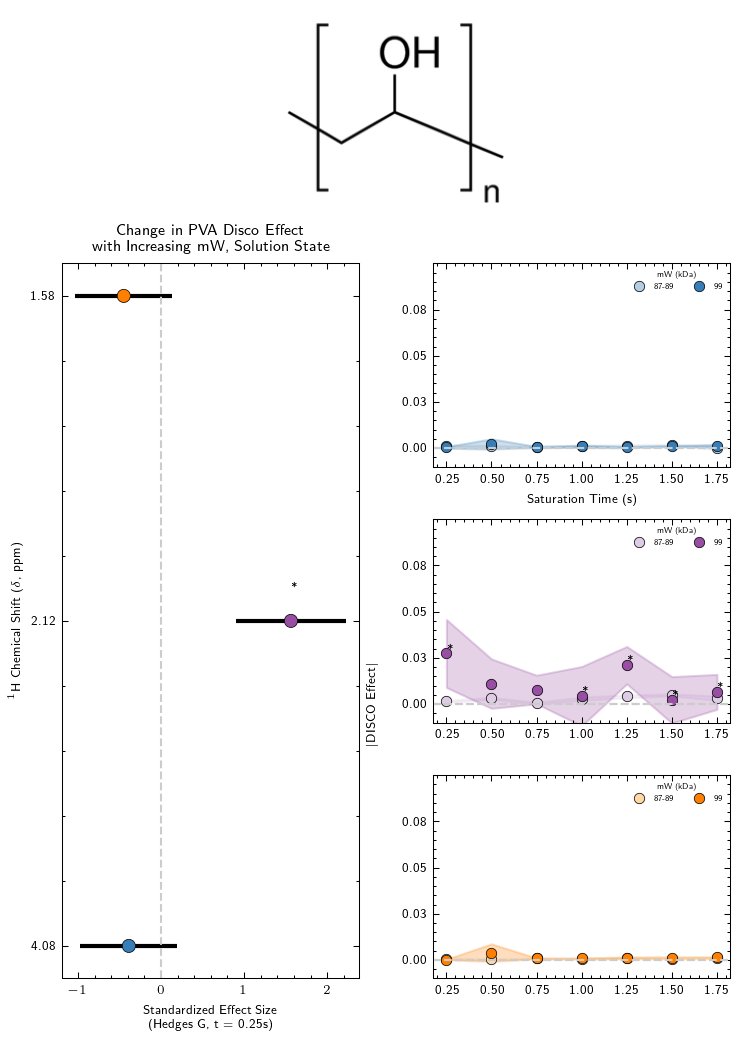

In [10]:
# now assemble the macro figure combining the interaction information and the "delta" information
mosaic = """
    AA
    BK
    BJ
    BI
"""


gs_kw = dict(width_ratios=[1.0, 1],
             height_ratios=[1, 1, 1, 1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(5, 7),
                              constrained_layout=False, dpi=150)

# always ensure low to high order for correct labelling
pva_names = ["87-89", "99"]
ppm_colors = ['#377eb8', '#984ea3', '#ff7f00', '#e41a1c', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999']

# low vs high per ppm
buildup_colors9 = ['#f2f2f2',  '#999999']
buildup_colors8 = ['#e5d8bd',  '#a65628']
buildup_colors7 = ['#ccebc5', '#4daf4a']
buildup_colors6 = ['#fed9a6', '#ffff33']
buildup_colors5 = ['#fddaec',  '#f781bf']
buildup_colors4 = ['#fbb4ae',  '#e41a1c']
buildup_colors3 = ['#fed9a6', '#ff7f00']
buildup_colors2 = ["#decbe4", "#984ea3"]
buildup_colors1 = ['#b3cde3', '#377eb8']

kwargs = {"labels": pva_names,
          "dx": 0.001,
          "dy": 0.0020,
          "change_significance": pva_effect_size_df,
          "annot_color": "#000000"}

# Structure Axis
axd['A'].imshow(pva_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)
axd['A'].set_xlabel("PVA")


# add delta fingerprint - difference
add_difference_plot(df=pva_subset_sattime_df,ax=axd['B'], dy=0.1, **{"custom_colors": ppm_colors})
axd["B"].set_title("Change in PVA Disco Effect\nwith Increasing mW, Solution State")
axd["B"].set_xlabel("Standardized Effect Size \n(Hedges G, t = 0.25s)")
axd["B"].set_ylabel("$^1$H Chemical Shift ($\delta$, ppm)")

# add buildup curve subtractions for each peak
df_list = [ppi_1_low, ppi_1_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['K'], **kwargs, **{"custom_colors": buildup_colors1})
axd['K'].set_ylim((-0.01, 0.1))
axd['K'].yaxis.set_ticks(np.arange(0.0, 0.1, 0.025))
axd['K'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))
axd['K'].set_xlabel("Saturation Time (s)")

df_list = [ppi_2_low, ppi_2_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['J'], **kwargs, **{"custom_colors": buildup_colors2})
axd['J'].set_ylim((-0.01, 0.1))
axd['J'].yaxis.set_ticks(np.arange(0.0, 0.1, 0.025))
axd['J'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_3_low, ppi_3_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['I'], **kwargs, **{"custom_colors": buildup_colors3})
axd['I'].set_ylim((-0.01, 0.1))
axd['I'].yaxis.set_ticks(np.arange(0.0, 0.1, 0.025))
axd['I'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))


# format legend(s)
legends = ["I", "J", "K"]
props = dict(boxstyle='round', facecolor='white', linewidth=1.0)
for letter in legends:
    leg = axd[f'{letter}'].legend(
        loc='upper right', title="mW (kDa)", frameon=False, fontsize=4, ncol=2)
    leg.get_frame().set_edgecolor('k')
    leg.get_title().set_fontsize('4')

    # set decimal places in plot
    axd[f'{letter}'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axd[f'{letter}'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# buildup curve labels
t = axd['J'].text(-0.20, 0.0, "$$|\mbox{DISCO Effect}|$$", ha="left", va="center", rotation=90)
plt.tight_layout()

# write to file
output_filename = f"{output_directory}/pva_peakwisebuildups.svg"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

# save as png
output_filename2 = f"{output_directory}/pva_peakwisebuildups.png"
fig.patch.set_facecolor('white')
fig.savefig(output_filename2, dpi=500, transparent=False)


### PVA NP Change Profile

In [11]:
print("PVA AuNP Results:")
pva_np_effect_size_df = generate_disco_effect_mean_diff_df(low_PVA_NP, high_PVA_NP)
pva_np_subset_sattime_df = generate_subset_sattime_df(pva_np_effect_size_df, 0.25)


PVA AuNP Results:
Sig Point is: 0.25, 2.11805, p = 0.0006265394630837544, n = 3
Sig Point is: 0.5, 2.11805, p = 0.030825282293130342, n = 3
Sig Point is: 0.75, 2.11805, p = 0.0029371710732866594, n = 3
Sig Point is: 1.0, 2.11805, p = 0.00149762330772603, n = 3
Sig Point is: 1.25, 4.07685, p = 0.04325824922953731, n = 3
Sig Point is: 1.25, 2.11805, p = 0.000802163959782993, n = 3
Sig Point is: 1.5, 2.11805, p = 0.009150095194577141, n = 3
Sig Point is: 1.75, 2.11805, p = 0.015931037072297007, n = 3


In [12]:
ppi_1_low = assemble_peak_buildup_df(low_PVA_NP, 1)
ppi_2_low = assemble_peak_buildup_df(low_PVA_NP, 2)
ppi_3_low = assemble_peak_buildup_df(low_PVA_NP, 3)

ppi_1_high = assemble_peak_buildup_df(high_PVA_NP, 1)
ppi_2_high = assemble_peak_buildup_df(high_PVA_NP, 2)
ppi_3_high = assemble_peak_buildup_df(high_PVA_NP, 3)


PVA AuNP Change Profile:

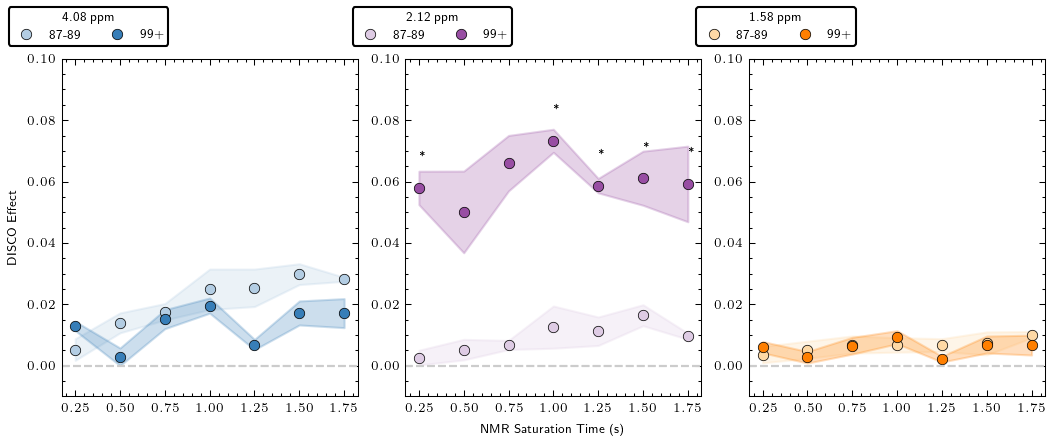

In [13]:
mosaic = """
    ...
    EDC
    ...
    """

gs_kw = dict(height_ratios = [0.35,1.0, 0.5], width_ratios = [1,1,1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(7,5),
                              constrained_layout=False, dpi = 150)

pva_structure = plt.imread("../data/external/pva_repeatunit.png", format = "png")

pva_names = ["87-89", "99+"] # always ensure low to high order for correct labelling
legend_title = "PVA Percent Hydrolysis"
kwargs = {"labels":pva_names,
          "legend_title":legend_title,
          "dx":0.00,
          "dy":0.01,
          "ppm_colors": ppm_colors,
          "change_significance":pva_effect_size_df,
          "annot_color":"#000000"} 


# add overlaid buildup curve for just 1.58
df_list = [ppi_3_low, ppi_3_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['C'], **kwargs, **{"custom_colors": buildup_colors3})
axd['C'].legend(title = "1.58 ppm",bbox_to_anchor=(-0.2, 1.02, 0.01, .09), loc='lower left',
                ncol=2, mode=None, borderaxespad=0.5,
                frameon=True, edgecolor='black',
                framealpha=1)

axd['C'].set_ylim((-0.01, 0.1))

# add buildup curve subtraction just for 2.12 peak
df_list = [ppi_2_low, ppi_2_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['D'], **kwargs, **{"custom_colors": buildup_colors2})
# axd['E'].set_ylabel("Absolute DISCO Effect")
axd['D'].legend(title="2.12 ppm", bbox_to_anchor=(-0.2, 1.02, 0.01, .09), loc='lower left',
                ncol=2, mode=None, borderaxespad=0.5,
                frameon=True, edgecolor='black',
                framealpha=1)
axd['D'].set_ylim((-0.01,0.1))
axd['D'].set_xlabel ("NMR Saturation Time (s)")

# add overlaid buildup curves for just 4.08
df_list = [ppi_1_low, ppi_1_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['E'], **kwargs, **{"custom_colors": buildup_colors1})
# axd['E'].legend(loc = "upper right")
axd['E'].legend(title = "4.08 ppm", bbox_to_anchor=(-0.2, 1.02, 0.01, .09), loc='lower left',
                ncol=2, mode=None, borderaxespad=0.5,
                frameon=True, edgecolor='black',
                framealpha=1)
axd['E'].set_ylim((-0.01, 0.1))
axd['E'].set_ylabel("DISCO Effect")

output_filename = f"{output_directory}/PVA_NP_changefigure_transposed.png"
fig.patch.set_facecolor('white')
plt.tight_layout(pad = 0.5)
fig.savefig(output_filename, dpi=500, transparent=False)



### Solution State and NP PVA Summary Profile

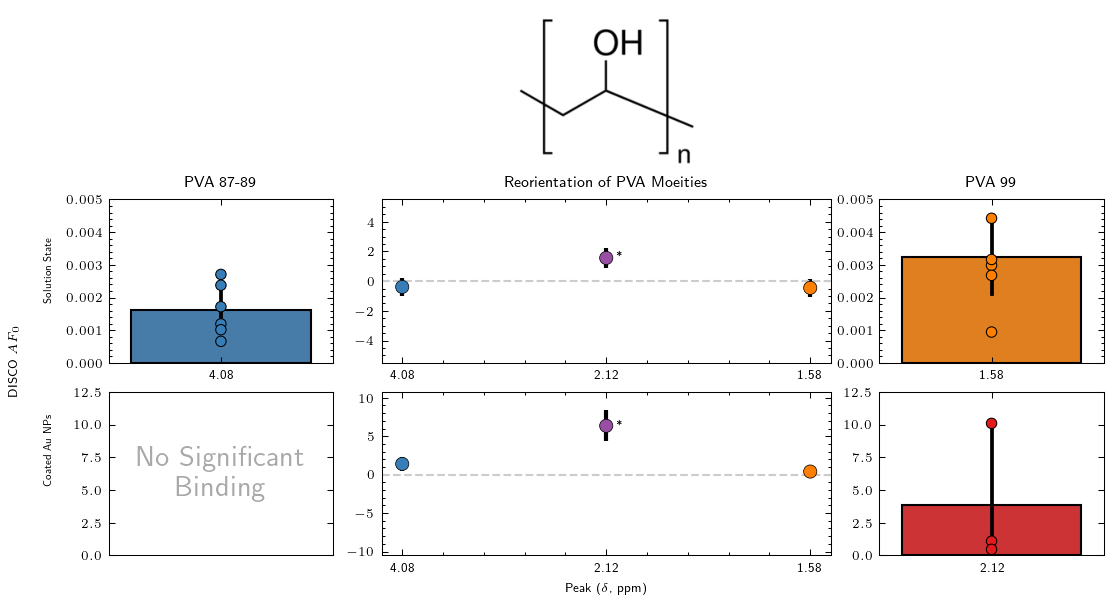

In [14]:
mosaic = '''
.A.
BCD
EFG
'''

gs_kw = dict(width_ratios=[1.25, 2.5, 1.25], height_ratios=[4, 4, 4])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(7, 4),
                              constrained_layout=False, dpi=150)

# Structure Axis, all peaks id'd
axd['A'].imshow(pva_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)

# SOLUTION STATE ------
# add Low Fingerprint
kwargs = {"custom_palette": ["#377eb8"]}
add_fingerprint_toax(low_PVA_AFo, axd['B'], **kwargs)
axd['B'].set_ylim(0.0, 0.005)
axd['B'].set_ylabel(" ")
axd['B'].set_title("PVA 87-89")
axd['B'].set_xlabel(" ")

# add solution state change fingerprint
add_difference_plot_transposed(df=pva_subset_sattime_df, ax=axd['C'], dy=0.1, **{"custom_colors": ppm_colors})
axd["C"].set_title("Reorientation of PVA Moeities")
axd["C"].set_ylim(-5.5, 5.5)

# add high binding fingerprint
kwargs = {"custom_palette": ['#ff7f00']}
add_fingerprint_toax(high_PVA_AFo, axd['D'], **kwargs)
axd['D'].set_ylim(0.0, 0.005)
axd['D'].set_title("PVA 99")
axd['D'].set_ylabel(" ")  # Absolute DISCO $AF_0$
axd['D'].set_xlabel(" ")

# NP STATE ------
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

# add low binding fingerprint
kwargs = {"custom_palette": ["#377eb8"]}
annotate_axes(axd['E'], "No Significant\nBinding", fontsize = 14)
axd['E'].set_ylim(0.0, 10.5)
axd['E'].set_yticks(axd['E'].get_yticks(), minor=True)
axd['E'].set_xlabel("Peak ($\delta$, ppm)")
axd['E'].xaxis.set_visible(False)

# add NP change fingerprint
add_difference_plot_transposed(df=pva_np_subset_sattime_df, ax=axd['F'], dy=0.1, **{"custom_colors": ppm_colors})
axd["F"].set_xlabel("Peak ($\delta$, ppm)")
axd["F"].set_ylim(-10.5, 10.75)

# add High Fingerprint
kwargs = {"custom_palette": ['#e41a1c']}
add_fingerprint_toax(high_PVA_AFo_NP, axd['G'], **kwargs)
axd['G'].set_ylim(0.0, 10.75)
axd['G'].set_yticks(axd['G'].get_yticks(), minor = True)
axd['G'].set_ylabel(" ")
axd['G'].set_xlabel(" ")


fig.text(-0.05, 0.40, 'DISCO $AF_0$', va='center', rotation=90)
fig.text(-0.015, 0.55, 'Solution State', va='center', rotation=90, fontsize = 'small')
fig.text(-0.015, 0.25, 'Coated Au NPs', va='center', rotation=90, fontsize = 'small')

output_filename = f"{output_directory}/PVA_change_fig.png"
fig.patch.set_facecolor('white')
plt.tight_layout(pad=0.5)
fig.savefig(output_filename, dpi=500, transparent=False)


### PEG Profiles

In [15]:
peg_20k_path = "../data/raw/stats_analysis_output_mean_all_PEG_20k_20uM.xlsx"  # n = 3
peg_20k_df = pd.read_excel(peg_20k_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

# n = 3 version
peg_10k_path = "../data/raw/stats_analysis_output_mean_all_PEG_10k_20uM.xlsx"  # n = 3
peg_10k_df = pd.read_excel(peg_10k_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

# n = 3 version
peg_2k_path = "../data/raw/stats_analysis_output_mean_all_PEG_2k_20uM.xlsx"  # n = 3
peg_2k_df = pd.read_excel(peg_2k_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

coohpeg_path = "../data/raw/stats_analysis_output_mean_all_PLGAPEG_20k_75uM.xlsx"  # n = 3
coohpeg_df = pd.read_excel(coohpeg_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

# n = 3 version
mpeg_path = "../data/raw/stats_analysis_output_mean_all_PLGAMPEG_20k_75uM.xlsx"  # n = 3
mpeg_df = pd.read_excel(mpeg_path, index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()

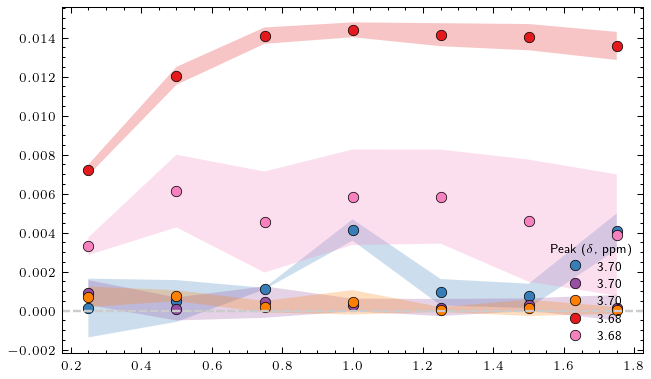

In [16]:
mosaic = '''
A
'''

gs_kw = dict(width_ratios=[1], height_ratios=[1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(5, 3),
                              constrained_layout=False, dpi=150)


kwargs = {"plot_title": "Absolute DISCO Effect, PEG",
          "filename": "PEG_figure",
          "polymer_names": ["2kDa", "10kDA", "20kDa", "COOHPEG NP 5kDa", "MPEG NP 5kDa"],
          "plot_ylabel": "Absolute Disco Effect",
          "absolute_disco": True,
          "annotation_type": "bind",
          "dx": 0.015,
          "dy": 0.0001}

np_list = [peg_2k_df.abs(), peg_10k_df.abs(), peg_20k_df.abs(), coohpeg_df.abs(), mpeg_df.abs()]

for nanoparticle_df in np_list:
    add_buildup_toax(nanoparticle_df, ax = axd['A'])



### PVP NP Change Profiles, 55kDa Solution to NP

In [17]:
# grab data
low_PVP55 = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVP_55k_20uM.xlsx",
                        index_col=[0], header=[0]).reset_index(drop=True)

high_PVP55 = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_AuNP-PVP_55kDa_1uM.xlsx",
                         index_col=[0], header=[0]).reset_index(drop=True)

In [18]:
effect_size_df = generate_disco_effect_mean_diff_df(low_PVP55, high_PVP55)
subset_sattime_df = generate_subset_sattime_df(effect_size_df, 0.25)

ppi_1_low = assemble_peak_buildup_df(low_PVP55, 1)
ppi_2_low = assemble_peak_buildup_df(low_PVP55, 2)
ppi_3_low = assemble_peak_buildup_df(low_PVP55, 3)
ppi_4_low = assemble_peak_buildup_df(low_PVP55, 4)
ppi_5_low = assemble_peak_buildup_df(low_PVP55, 5)
ppi_6_low = assemble_peak_buildup_df(low_PVP55, 6)
ppi_7_low = assemble_peak_buildup_df(low_PVP55, 7)
ppi_8_low = assemble_peak_buildup_df(low_PVP55, 8)

ppi_1_high = assemble_peak_buildup_df(high_PVP55, 1)
ppi_2_high = assemble_peak_buildup_df(high_PVP55, 2)
ppi_3_high = assemble_peak_buildup_df(high_PVP55, 3)
ppi_4_high = assemble_peak_buildup_df(high_PVP55, 4)
ppi_5_high = assemble_peak_buildup_df(high_PVP55, 5)
ppi_6_high = assemble_peak_buildup_df(high_PVP55, 6)
ppi_7_high = assemble_peak_buildup_df(high_PVP55, 7)
ppi_8_high = assemble_peak_buildup_df(high_PVP55, 8)


Sig Point is: 0.25, 3.89, p = 7.601242127453649e-05, n = 6
Sig Point is: 0.25, 3.22, p = 0.008587317075324874, n = 6
Sig Point is: 0.25, 2.51, p = 0.023534234251967198, n = 6
Sig Point is: 0.25, 2.27, p = 0.010010051947198388, n = 6
Sig Point is: 0.25, 2.03, p = 0.0003006751249436502, n = 6
Sig Point is: 0.25, 1.78, p = 0.004660271644235901, n = 6
Sig Point is: 0.25, 1.545, p = 5.211678419230527e-06, n = 6
Sig Point is: 0.5, 3.89, p = 1.755874742220644e-05, n = 6
Sig Point is: 0.5, 3.6, p = 0.03236791014370518, n = 6
Sig Point is: 0.5, 3.22, p = 0.00850502231271564, n = 6
Sig Point is: 0.5, 2.51, p = 0.0041594288838663245, n = 6
Sig Point is: 0.5, 2.03, p = 0.0028231915377723137, n = 6
Sig Point is: 0.5, 1.78, p = 0.03204945994612611, n = 6
Sig Point is: 0.5, 1.545, p = 0.0004352735641071864, n = 6
Sig Point is: 0.75, 3.89, p = 4.097286929568708e-07, n = 6
Sig Point is: 0.75, 3.6, p = 0.012670096698695132, n = 6
Sig Point is: 0.75, 3.22, p = 0.014397237906694508, n = 6
Sig Point is: 0.

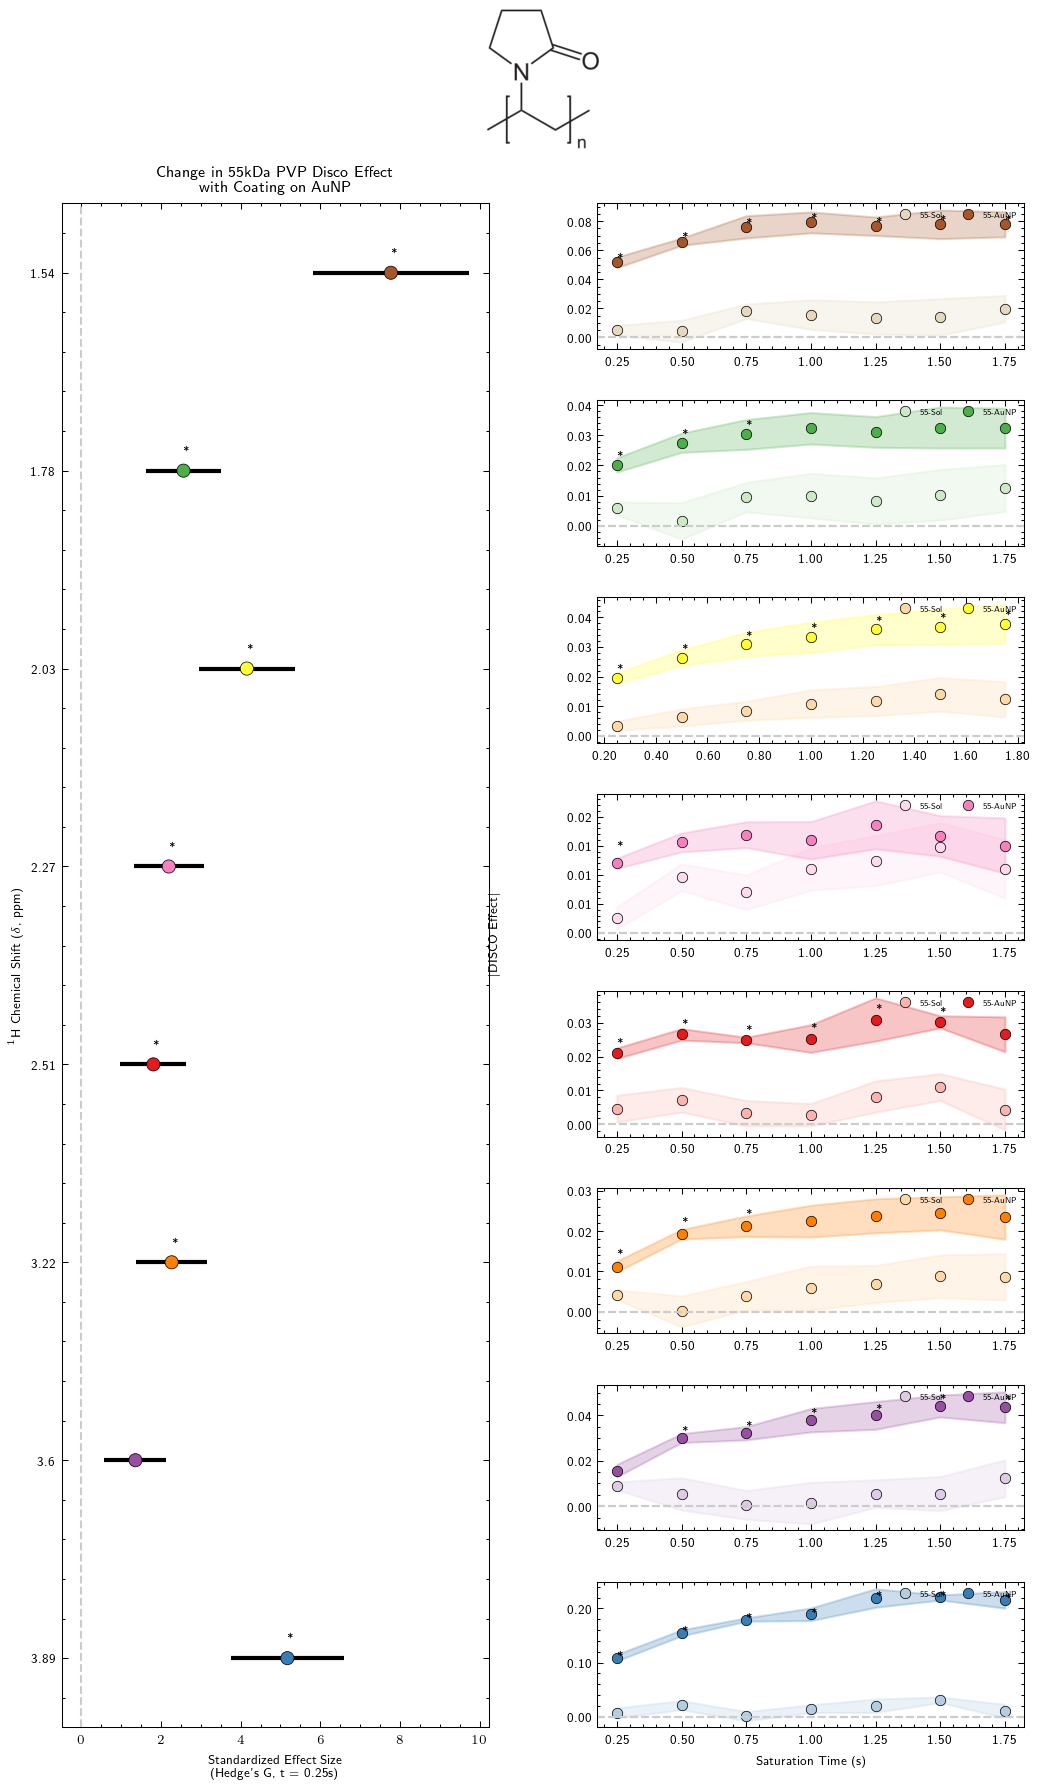

In [19]:
# now assemble the macro figure combining the interaction information and the "delta" information
mosaic = """
    AA
    BC
    BD
    BE
    BF
    BG
    BH
    BI
    BJ
    """
gs_kw = dict(width_ratios=[1, 1],
             height_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(7, 12),
                              constrained_layout=False, dpi=150)

pvp_structure = plt.imread("../data/external/pvp_repeatunit.png", format="png")

# always ensure low to high order for correct labelling
pvp_names = ["55-Sol", "55-AuNP"]


# PVA Structure Axis
axd['A'].imshow(pvp_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)
axd['A'].set_xlabel("Poly(vinyl pyrrolidone)")

ppm_colors = ['#377eb8', '#984ea3', '#ff7f00', '#e41a1c', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999']

# low vs high per ppm
buildup_colors8 = ['#e5d8bd',  '#a65628']
buildup_colors7 = ['#ccebc5', '#4daf4a']
buildup_colors6 = ['#fed9a6', '#ffff33']
buildup_colors5 = ['#fddaec',  '#f781bf']
buildup_colors4 = ['#fbb4ae',  '#e41a1c']
buildup_colors3 = ['#fed9a6', '#ff7f00']
buildup_colors2 = ["#decbe4", "#984ea3"]
buildup_colors1 = ['#b3cde3', '#377eb8']

# low vs high, grey
grey_colors = ['#bdbdbd', '#636363']

kwargs = {"labels": pvp_names,
          "dx": 0.00,
          "dy": 0.003,
          "change_significance": effect_size_df,
          "annot_color": "#000000"}


# add delta fingerprint - difference
add_difference_plot(
    df=subset_sattime_df, ax=axd['B'], dy=0.1, **{"custom_colors": ppm_colors})
axd["B"].set_title("Change in 55kDa PVP Disco Effect\nwith Coating on AuNP")
axd["B"].set_xlabel(
    "Standardized Effect Size \n(Hedge's G, t = 0.25s)")
axd["B"].set_ylabel("$^1$H Chemical Shift ($\delta$, ppm)")

# add buildup curve subtractions for each peak
df_list = [ppi_1_low, ppi_1_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['J'], **kwargs, **{"custom_colors": buildup_colors1})
# axd['J'].set_ylim((-0.01, 0.08))
axd['J'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))
axd['J'].set_xlabel("Saturation Time (s)")

df_list = [ppi_2_low, ppi_2_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['I'], **kwargs, **{"custom_colors": buildup_colors2})
# axd['I'].set_ylim((-0.01, 0.08))
axd['I'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_3_low, ppi_3_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['H'], **kwargs, **{"custom_colors": buildup_colors3})
# axd['H'].set_ylim((-0.01, 0.08))
axd['H'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_4_low, ppi_4_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['G'], **kwargs, **{"custom_colors": buildup_colors4})
# axd['G'].set_ylim((-0.01, 0.08))
axd['G'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_5_low, ppi_5_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['F'], **kwargs, **{"custom_colors": buildup_colors5})
# axd['F'].set_ylim((-0.01, 0.08))
axd['F'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_6_low, ppi_6_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['E'], **kwargs, **{"custom_colors": buildup_colors6})
# axd['E'].set_ylim((-0.01, 0.08))

df_list = [ppi_7_low, ppi_7_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['D'], **kwargs, **{"custom_colors": buildup_colors7})
# axd['D'].set_ylim((-0.01, 0.08))
axd['D'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_8_low, ppi_8_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['C'], **kwargs, **{"custom_colors": buildup_colors8})
# axd['C'].set_ylim((-0.01, 0.08))
axd['C'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

# format legend(s)
legends = ["C", "D", "E", "F", "G", "H", "I", "J"]
props = dict(boxstyle='round', facecolor='white', linewidth=1.0)
for letter in legends:
    leg = axd[f'{letter}'].legend(
        loc='upper right', frameon=False, fontsize=4, ncol=2)
    leg.get_frame().set_edgecolor('k')
    leg.get_title().set_fontsize('4')

    # set decimal places in plot
    axd[f'{letter}'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axd[f'{letter}'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# buildup curve labels
t = axd['F'].text(-0.25, 0.0, "$$|\mbox{DISCO Effect}|$$", ha="left", va="center", rotation=90)
plt.tight_layout()

# save as png
output_filename = f"{output_directory}/pvp55_buildups.png"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

# save as svg
output_filename = f"{output_directory}/pvp55_buildups.svg"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)


### 1300 PVP Solution to AuNP Change Profile

In [20]:
# grab data
low_PVP1300 = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_PVP_1300k_20uM.xlsx",
                          index_col=[0], header=[0]).reset_index(drop=True)

high_PVP1300 = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_AuNP-PVP_1300kDa_1uM.xlsx",
                           index_col=[0], header=[0]).reset_index(drop=True)


In [21]:
effect_size_df = generate_disco_effect_mean_diff_df(low_PVP1300, high_PVP1300)
subset_sattime_df = generate_subset_sattime_df(effect_size_df, 0.25)

ppi_1_low = assemble_peak_buildup_df(low_PVP1300, 1)
ppi_2_low = assemble_peak_buildup_df(low_PVP1300, 2)
ppi_3_low = assemble_peak_buildup_df(low_PVP1300, 3)
ppi_4_low = assemble_peak_buildup_df(low_PVP1300, 4)
ppi_5_low = assemble_peak_buildup_df(low_PVP1300, 5)
ppi_6_low = assemble_peak_buildup_df(low_PVP1300, 6)
ppi_7_low = assemble_peak_buildup_df(low_PVP1300, 7)
ppi_8_low = assemble_peak_buildup_df(low_PVP1300, 8)

ppi_1_high = assemble_peak_buildup_df(high_PVP1300, 1)
ppi_2_high = assemble_peak_buildup_df(high_PVP1300, 2)
ppi_3_high = assemble_peak_buildup_df(high_PVP1300, 3)
ppi_4_high = assemble_peak_buildup_df(high_PVP1300, 4)
ppi_5_high = assemble_peak_buildup_df(high_PVP1300, 5)
ppi_6_high = assemble_peak_buildup_df(high_PVP1300, 6)
ppi_7_high = assemble_peak_buildup_df(high_PVP1300, 7)
ppi_8_high = assemble_peak_buildup_df(high_PVP1300, 8)


Sig Point is: 0.25, 3.89, p = 8.904688121339658e-07, n = 6
Sig Point is: 0.25, 3.22, p = 0.01640741073634725, n = 6
Sig Point is: 0.25, 2.51, p = 5.4079687326353684e-05, n = 6
Sig Point is: 0.25, 2.27, p = 0.002067685697979528, n = 6
Sig Point is: 0.25, 2.03, p = 8.160934735938119e-08, n = 6
Sig Point is: 0.25, 1.78, p = 3.417572303080387e-06, n = 6
Sig Point is: 0.25, 1.545, p = 0.000519007987342413, n = 6
Sig Point is: 0.5, 3.89, p = 8.524093253192116e-08, n = 6
Sig Point is: 0.5, 3.6, p = 0.013051154128876747, n = 6
Sig Point is: 0.5, 2.51, p = 0.001337434674865596, n = 6
Sig Point is: 0.5, 2.03, p = 1.9065352469960534e-05, n = 6
Sig Point is: 0.5, 1.78, p = 0.0003867898960421758, n = 6
Sig Point is: 0.5, 1.545, p = 0.0002592581517973147, n = 6
Sig Point is: 0.75, 3.89, p = 1.1301254794022624e-09, n = 6
Sig Point is: 0.75, 3.6, p = 0.04001049959689839, n = 6
Sig Point is: 0.75, 2.51, p = 0.0002607042555790828, n = 6
Sig Point is: 0.75, 2.03, p = 0.00047087785194145735, n = 6
Sig Poi

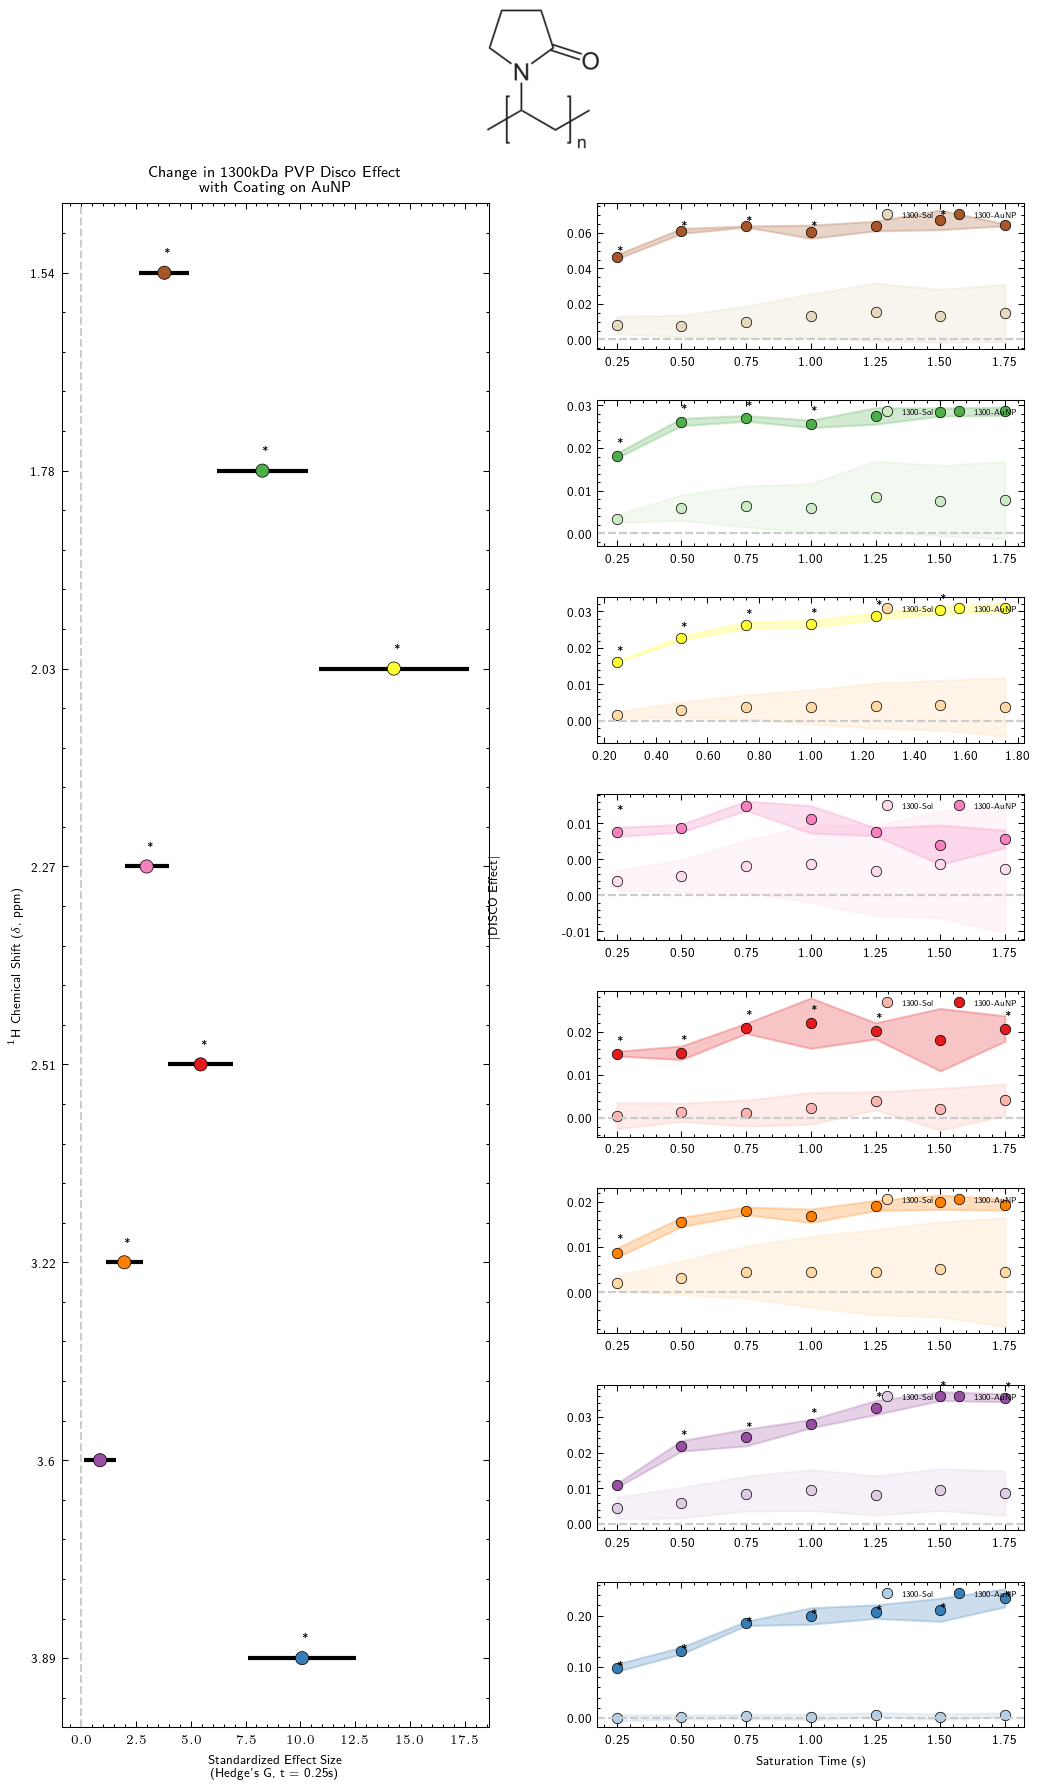

In [22]:
# now assemble the macro figure combining the interaction information and the "delta" information
mosaic = """
    AA
    BC
    BD
    BE
    BF
    BG
    BH
    BI
    BJ
    """
gs_kw = dict(width_ratios=[1, 1],
             height_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(7, 12),
                              constrained_layout=False, dpi=150)

pvp_structure = plt.imread("../data/external/pvp_repeatunit.png", format="png")

# always ensure low to high order for correct labelling
pvp_names = ["1300-Sol", "1300-AuNP"]


# PVA Structure Axis
axd['A'].imshow(pvp_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)
axd['A'].set_xlabel("Poly(vinyl pyrrolidone)")

ppm_colors = ['#377eb8', '#984ea3', '#ff7f00', '#e41a1c', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999']

# low vs high per ppm
buildup_colors8 = ['#e5d8bd',  '#a65628']
buildup_colors7 = ['#ccebc5', '#4daf4a']
buildup_colors6 = ['#fed9a6', '#ffff33']
buildup_colors5 = ['#fddaec',  '#f781bf']
buildup_colors4 = ['#fbb4ae',  '#e41a1c']
buildup_colors3 = ['#fed9a6', '#ff7f00']
buildup_colors2 = ["#decbe4", "#984ea3"]
buildup_colors1 = ['#b3cde3', '#377eb8']

# low vs high, grey
grey_colors = ['#bdbdbd', '#636363']

kwargs = {"labels": pvp_names,
          "dx": 0.00,
          "dy": 0.003,
          "change_significance": effect_size_df,
          "annot_color": "#000000"}


# add delta fingerprint - difference
add_difference_plot(
    df=subset_sattime_df, ax=axd['B'], dy=0.1, **{"custom_colors": ppm_colors})
axd["B"].set_title("Change in 1300kDa PVP Disco Effect\nwith Coating on AuNP")
axd["B"].set_xlabel(
    "Standardized Effect Size \n(Hedge's G, t = 0.25s)")
axd["B"].set_ylabel("$^1$H Chemical Shift ($\delta$, ppm)")

# add buildup curve subtractions for each peak
df_list = [ppi_1_low, ppi_1_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['J'], **kwargs, **{"custom_colors": buildup_colors1})
# axd['J'].set_ylim((-0.01, 0.08))
axd['J'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))
axd['J'].set_xlabel("Saturation Time (s)")

df_list = [ppi_2_low, ppi_2_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['I'], **kwargs, **{"custom_colors": buildup_colors2})
# axd['I'].set_ylim((-0.01, 0.08))
axd['I'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_3_low, ppi_3_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['H'], **kwargs, **{"custom_colors": buildup_colors3})
# axd['H'].set_ylim((-0.01, 0.08))
axd['H'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_4_low, ppi_4_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['G'], **kwargs, **{"custom_colors": buildup_colors4})
# axd['G'].set_ylim((-0.01, 0.08))
axd['G'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_5_low, ppi_5_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['F'], **kwargs, **{"custom_colors": buildup_colors5})
# axd['F'].set_ylim((-0.01, 0.08))
axd['F'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_6_low, ppi_6_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['E'], **kwargs, **{"custom_colors": buildup_colors6})
# axd['E'].set_ylim((-0.01, 0.08))

df_list = [ppi_7_low, ppi_7_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['D'], **kwargs, **{"custom_colors": buildup_colors7})
# axd['D'].set_ylim((-0.01, 0.08))
axd['D'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_8_low, ppi_8_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['C'], **kwargs, **{"custom_colors": buildup_colors8})
# axd['C'].set_ylim((-0.01, 0.08))
axd['C'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

# format legend(s)
legends = ["C", "D", "E", "F", "G", "H", "I", "J"]
props = dict(boxstyle='round', facecolor='white', linewidth=1.0)
for letter in legends:
    leg = axd[f'{letter}'].legend(
        loc='upper right', frameon=False, fontsize=4, ncol=2)
    leg.get_frame().set_edgecolor('k')
    leg.get_title().set_fontsize('4')

    # set decimal places in plot
    axd[f'{letter}'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axd[f'{letter}'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# buildup curve labels
t = axd['F'].text(-0.25, 0.0, "$$|\mbox{DISCO Effect}|$$", ha="left", va="center", rotation=90)
plt.tight_layout()

# save as png
output_filename = f"{output_directory}/pvp1300_buildups.png"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

# save as svg
output_filename = f"{output_directory}/pvp1300_buildups.svg"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)


### Change Profiles, low to high mW on an NP

In [23]:
effect_size_df = generate_disco_effect_mean_diff_df(high_PVP55, high_PVP1300)
subset_sattime_df = generate_subset_sattime_df(effect_size_df, 0.25)

ppi_1_low = assemble_peak_buildup_df(high_PVP55, 1)
ppi_2_low = assemble_peak_buildup_df(high_PVP55, 2)
ppi_3_low = assemble_peak_buildup_df(high_PVP55, 3)
ppi_4_low = assemble_peak_buildup_df(high_PVP55, 4)
ppi_5_low = assemble_peak_buildup_df(high_PVP55, 5)
ppi_6_low = assemble_peak_buildup_df(high_PVP55, 6)
ppi_7_low = assemble_peak_buildup_df(high_PVP55, 7)
ppi_8_low = assemble_peak_buildup_df(high_PVP55, 8)

ppi_1_high = assemble_peak_buildup_df(high_PVP1300, 1)
ppi_2_high = assemble_peak_buildup_df(high_PVP1300, 2)
ppi_3_high = assemble_peak_buildup_df(high_PVP1300, 3)
ppi_4_high = assemble_peak_buildup_df(high_PVP1300, 4)
ppi_5_high = assemble_peak_buildup_df(high_PVP1300, 5)
ppi_6_high = assemble_peak_buildup_df(high_PVP1300, 6)
ppi_7_high = assemble_peak_buildup_df(high_PVP1300, 7)
ppi_8_high = assemble_peak_buildup_df(high_PVP1300, 8)


Sig Point is: 0.25, 2.5096, p = 0.021092530519052573, n = 3
Sig Point is: 0.25, 2.2728, p = 0.04271855108164028, n = 3
Sig Point is: 0.5, 3.5973, p = 0.030811589813907476, n = 3
Sig Point is: 0.5, 2.5096, p = 0.008004235370831688, n = 3
Sig Point is: 0.5, 2.2728, p = 0.021960919457390652, n = 3
Sig Point is: 0.75, 2.5096, p = 0.04495431411868084, n = 3


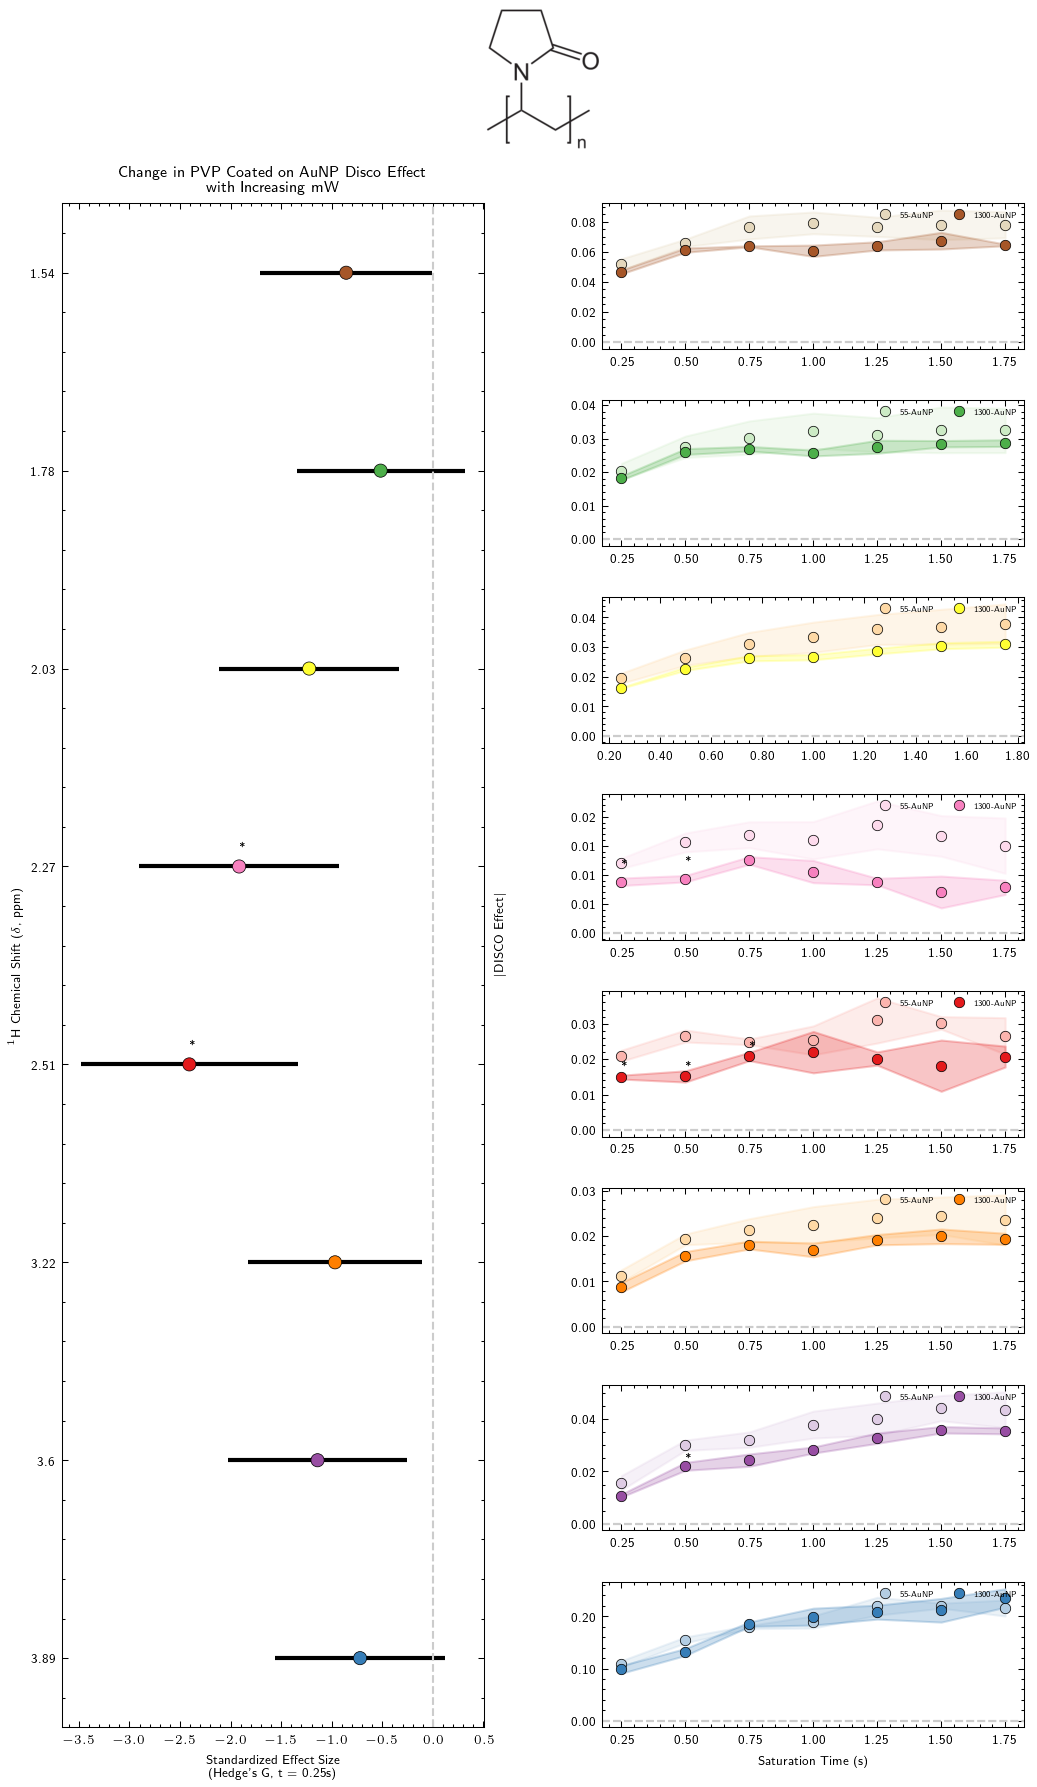

In [24]:
# now assemble the macro figure combining the interaction information and the "delta" information
mosaic = """
    AA
    BC
    BD
    BE
    BF
    BG
    BH
    BI
    BJ
    """
gs_kw = dict(width_ratios=[1, 1],
             height_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(7, 12),
                              constrained_layout=False, dpi=150)

pvp_structure = plt.imread("../data/external/pvp_repeatunit.png", format="png")

# always ensure low to high order for correct labelling
pvp_names = ["55-AuNP", "1300-AuNP"]


# PVA Structure Axis
axd['A'].imshow(pvp_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)
axd['A'].set_xlabel("Poly(vinyl pyrrolidone)")

ppm_colors = ['#377eb8', '#984ea3', '#ff7f00', '#e41a1c', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999']

# low vs high per ppm
buildup_colors8 = ['#e5d8bd',  '#a65628']
buildup_colors7 = ['#ccebc5', '#4daf4a']
buildup_colors6 = ['#fed9a6', '#ffff33']
buildup_colors5 = ['#fddaec',  '#f781bf']
buildup_colors4 = ['#fbb4ae',  '#e41a1c']
buildup_colors3 = ['#fed9a6', '#ff7f00']
buildup_colors2 = ["#decbe4", "#984ea3"]
buildup_colors1 = ['#b3cde3', '#377eb8']

# low vs high, grey
grey_colors = ['#bdbdbd', '#636363']

kwargs = {"labels": pvp_names,
          "dx": 0.00,
          "dy": 0.003,
          "change_significance": effect_size_df,
          "annot_color": "#000000"}


# add delta fingerprint - difference
add_difference_plot(
    df=subset_sattime_df, ax=axd['B'], dy=0.1, **{"custom_colors": ppm_colors})
axd["B"].set_title("Change in PVP Coated on AuNP Disco Effect\nwith Increasing mW")
axd["B"].set_xlabel(
    "Standardized Effect Size \n(Hedge's G, t = 0.25s)")
axd["B"].set_ylabel("$^1$H Chemical Shift ($\delta$, ppm)")

# add buildup curve subtractions for each peak
df_list = [ppi_1_low, ppi_1_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['J'], **kwargs, **{"custom_colors": buildup_colors1})
# axd['J'].set_ylim((-0.01, 0.08))
axd['J'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))
axd['J'].set_xlabel("Saturation Time (s)")

df_list = [ppi_2_low, ppi_2_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['I'], **kwargs, **{"custom_colors": buildup_colors2})
# axd['I'].set_ylim((-0.01, 0.08))
axd['I'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_3_low, ppi_3_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['H'], **kwargs, **{"custom_colors": buildup_colors3})
# axd['H'].set_ylim((-0.01, 0.08))
axd['H'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_4_low, ppi_4_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['G'], **kwargs, **{"custom_colors": buildup_colors4})
# axd['G'].set_ylim((-0.01, 0.08))
axd['G'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_5_low, ppi_5_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['F'], **kwargs, **{"custom_colors": buildup_colors5})
# axd['F'].set_ylim((-0.01, 0.08))
axd['F'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_6_low, ppi_6_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['E'], **kwargs, **{"custom_colors": buildup_colors6})
# axd['E'].set_ylim((-0.01, 0.08))

df_list = [ppi_7_low, ppi_7_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['D'], **kwargs, **{"custom_colors": buildup_colors7})
# axd['D'].set_ylim((-0.01, 0.08))
axd['D'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_8_low, ppi_8_high]
add_overlaid_buildup_toax_customlabels(
    df_list, axd['C'], **kwargs, **{"custom_colors": buildup_colors8})
# axd['C'].set_ylim((-0.01, 0.08))
axd['C'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

# format legend(s)
legends = ["C", "D", "E", "F", "G", "H", "I", "J"]
props = dict(boxstyle='round', facecolor='white', linewidth=1.0)
for letter in legends:
    leg = axd[f'{letter}'].legend(
        loc='upper right', frameon=False, fontsize=4, ncol=2)
    leg.get_frame().set_edgecolor('k')
    leg.get_title().set_fontsize('4')

    # set decimal places in plot
    axd[f'{letter}'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axd[f'{letter}'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# buildup curve labels
t = axd['F'].text(-0.25, 0.0, "$$|\mbox{DISCO Effect}|$$", ha="left", va="center", rotation=90)
plt.tight_layout()

# save as png
output_filename = f"{output_directory}/pvp_npmwchange_buildups.png"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

# save as svg
output_filename = f"{output_directory}/pvp_npmwchange_buildups.svg"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)


# For Reference, HPC Templates:

### HPC 370kDa Profile

In [25]:
# query the required data tables for all styles of plotting for desired polymers
# high mW HPC
high_hpc_mean_all = pd.read_excel("../data/raw/stats_analysis_output_mean_all_HPC_370k_20uM.xlsx", index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
high_hpc_mean_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_mean_HPC_370k_20uM.xlsx", index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
high_hpc_replicate_all = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_HPC_370k_20uM.xlsx", index_col=[0], header=[0]).reset_index(drop=True)
high_hpc_replicate_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_replicate_HPC_370k_20uM.xlsx", index_col=[0], header=[0]).reset_index(drop=True)

# low mW HPC
low_hpc_mean_all = pd.read_excel("../data/raw/stats_analysis_output_mean_all_HPC_80k_20uM.xlsx", index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
low_hpc_replicate_all = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_HPC_80k_20uM.xlsx", index_col=[0], header=[0]).reset_index(drop=True)
low_hpc_replicate_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_replicate_HPC_80k_20uM.xlsx", index_col=[0], header=[0]).reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/stats_analysis_output_mean_all_HPC_370k_20uM.xlsx'

Next, design a custom plot layout using the mosaic, and apply builtin functions to overlay DISCO AF0 fingerprints, and peak buildup curves as desired.

See this tutorial on Mosaic plots for a helpful introduction: https://matplotlib.org/stable/tutorials/provisional/mosaic.html

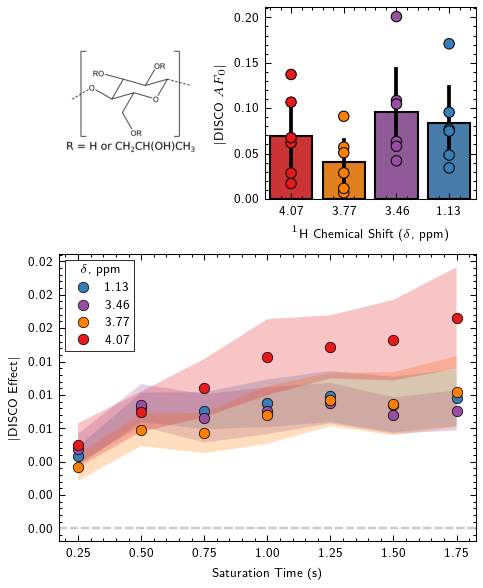

In [ ]:
mosaic = """
    AB
    CC
    """

gs_kw = dict(width_ratios=[1, 1.5], height_ratios=[1, 1.5])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(3.3, 4),
                              constrained_layout=False, dpi=150)

hpc_structure = plt.imread("../data/external/hpc_repeatunit.png", format="png")

# Polymer Structure Axis
axd['A'].imshow(hpc_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)

# Binding fingerprint plot
add_fingerprint_toax(high_hpc_replicate_bindingonly, axd['B'])
axd['B'].set_ylabel("$$|\mbox{DISCO $AF_0$}|$$")
axd['B'].set_xlabel("$^1$H Chemical Shift ($\delta$, ppm)")
axd['B'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Build up curve plot
add_buildup_toax(high_hpc_mean_bindingonly, axd['C'])
axd['C'].set_ylabel("$$|\mbox{DISCO Effect}|$$")
axd['C'].set_xlabel("Saturation Time (s)")
axd['C'].axhline(y=0.0, color="0.8", linestyle='dashed')
axd['C'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axd['C'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axd['C'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))
axd['C'].tick_params(axis='x')
axd['C'].tick_params(axis='y')

# format legend
props = dict(facecolor='white', linewidth=0.5)
legC = axd['C'].legend(loc='upper left', title="$\delta$, ppm", frameon=True, fontsize=6, fancybox = False)
legC.get_frame().set_edgecolor('k')
legC.get_title().set_fontsize('6')
legC.get_frame().set_linewidth(0.5)

# Write figures to file 
output_filename2 = f"{output_directory}/hpc.png"
output_filename = f"{output_directory}/hpc.svg"
plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)
fig.savefig(output_filename2, dpi=500, transparent=False)


### HPC Change Profile

The code below:
* preprocesses data to ready it for difference profile plotting. 
* subsets data to NMR Sat Time = 0.25s
* prints results report of statistical testing for change significance (p < 0.05)

The difference profile plot is created using the "subset_sattime_df," which contains only the mean difference in disco effect data computed for the desired saturation time slice (0.25s).

In [ ]:
print("HPC Results:")
hpc_effect_size_df = generate_disco_effect_mean_diff_df(low_hpc_replicate_all, high_hpc_replicate_all)
hpc_subset_sattime_df = generate_subset_sattime_df(hpc_effect_size_df, 0.25)

HPC Results:
Sig Point is: 0.25, 4.5814, p = 0.002852946493998779, n = 6
Sig Point is: 0.25, 4.06765, p = 0.022112708130022727, n = 6
Sig Point is: 0.5, 4.5814, p = 0.04792935070570668, n = 6
Sig Point is: 1.0, 4.06765, p = 0.02587405440747963, n = 6
Sig Point is: 1.5, 4.5814, p = 0.013839648335416047, n = 6
Sig Point is: 1.5, 4.06765, p = 0.030839653145183932, n = 6
Sig Point is: 1.75, 4.5814, p = 0.008178181853274912, n = 6


Now, assemble custom mosaic for plotting HPC's difference profile.

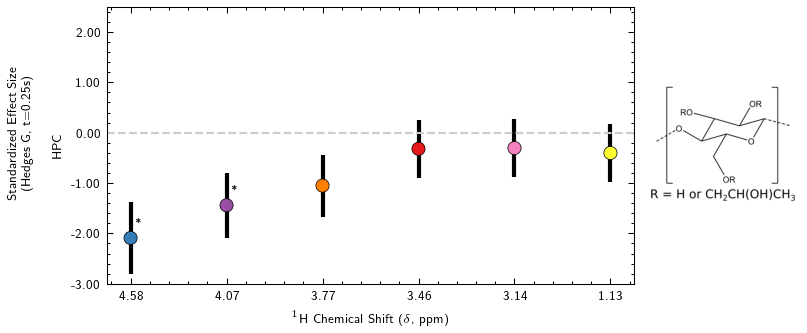

In [ ]:
mosaic = '''
E.B
'''

ppm_colors = ['#377eb8', '#984ea3', '#ff7f00', '#e41a1c', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999']

gs_kw = dict(width_ratios=[1,0.05,0.3], height_ratios=[2.5])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(5, 2),
                              constrained_layout=False, dpi=150)

# read image data
hpc_structure = plt.imread("../data/external/hpc_repeatunit.png", format="png")

# polymer structure - HPC
axd['B'].imshow(hpc_structure)
axd['B'].axis('off')
axd['B'].xaxis.set_visible(False)
axd['B'].yaxis.set_visible(False)

# difference fingerprint - HPC
add_difference_plot_transposed(df=hpc_subset_sattime_df, ax=axd['E'], dy=0.3, **{"custom_colors": ppm_colors})
axd["E"].set_ylabel("HPC")
axd["E"].set_ylim(-3, 2.5)  
axd['E'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axd['E'].set_xlabel("$^1$H Chemical Shift ($\delta$, ppm)")

# triple ax label
t = axd['E'].text(-0.15, 0, "Standardized Effect Size \n(Hedges G, t=0.25s)", ha="center", va="center", rotation=90)

# write to file
output_filename = f"{output_directory}/hpc_change_fig.svg"
output_filename2 = f"{output_directory}/hpc_change_fig.png"
fig.patch.set_facecolor('white')
plt.tight_layout(pad = -0.75)
fig.savefig(output_filename, dpi=500, transparent=False)
fig.savefig(output_filename2, dpi=500, transparent=False)


### HPC Change Profile, with peak-wise buildup curves

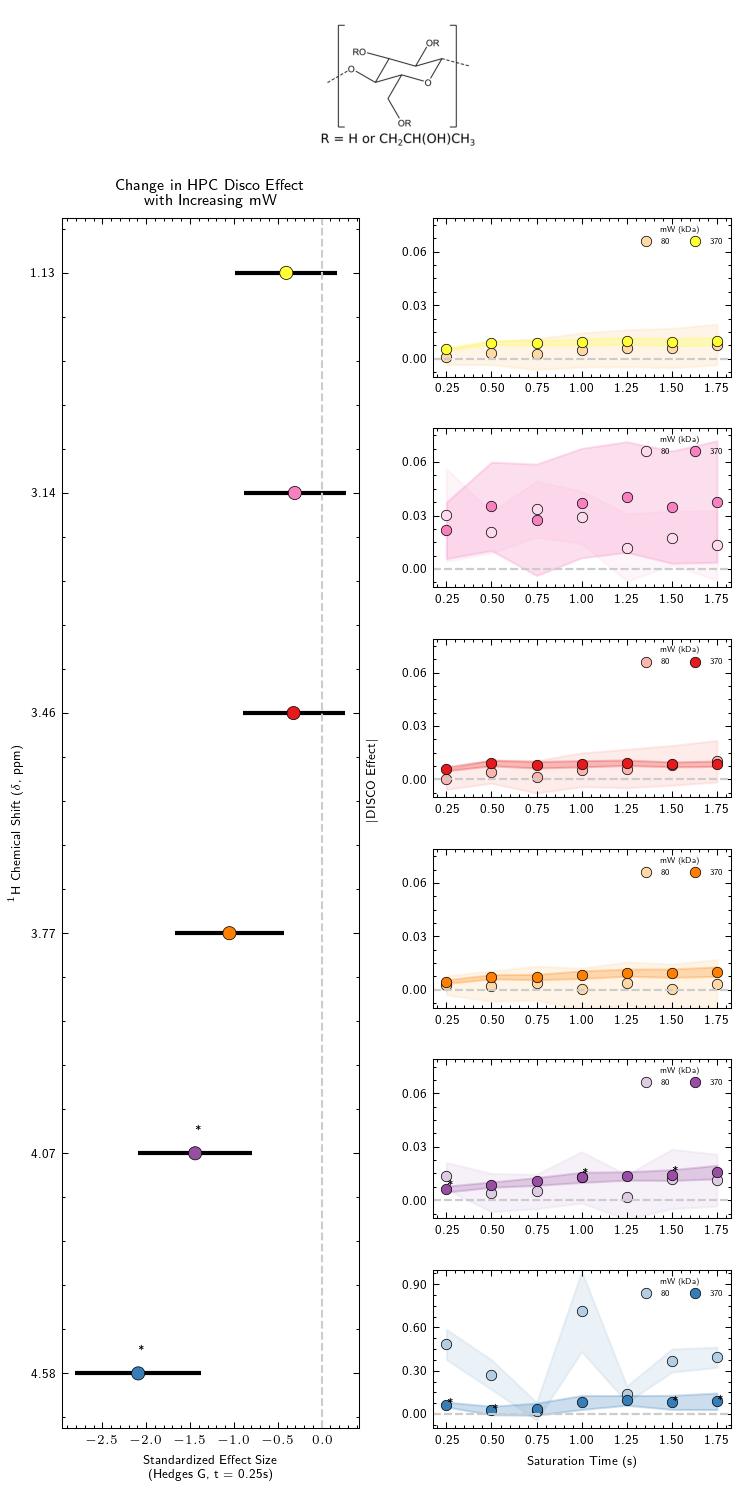

In [ ]:
# HPC
ppi_1_low = assemble_peak_buildup_df(low_hpc_replicate_all, 1)
ppi_2_low = assemble_peak_buildup_df(low_hpc_replicate_all, 2)
ppi_3_low = assemble_peak_buildup_df(low_hpc_replicate_all, 3)
ppi_4_low = assemble_peak_buildup_df(low_hpc_replicate_all, 4)
ppi_5_low = assemble_peak_buildup_df(low_hpc_replicate_all, 5)
ppi_6_low = assemble_peak_buildup_df(low_hpc_replicate_all, 6)

ppi_1_high = assemble_peak_buildup_df(high_hpc_replicate_all, 1)
ppi_2_high = assemble_peak_buildup_df(high_hpc_replicate_all, 2)
ppi_3_high = assemble_peak_buildup_df(high_hpc_replicate_all, 3)
ppi_4_high = assemble_peak_buildup_df(high_hpc_replicate_all, 4)
ppi_5_high = assemble_peak_buildup_df(high_hpc_replicate_all, 5)
ppi_6_high = assemble_peak_buildup_df(high_hpc_replicate_all, 6)

# now assemble the macro figure combining the interaction information and the "delta" information
mosaic = """
    AA
    BF
    BG
    BH
    BI
    BJ
    BK
"""


gs_kw = dict(width_ratios=[1.0, 1],
             height_ratios=[1, 1, 1, 1, 1, 1, 1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(5, 10),
                              constrained_layout=False, dpi=150)

# always ensure low to high order for correct labelling
hpc_names = ["80", "370"]
ppm_colors = ['#377eb8', '#984ea3', '#ff7f00', '#e41a1c', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999']

# low vs high per ppm
buildup_colors9 = ['#f2f2f2',  '#999999']
buildup_colors8 = ['#e5d8bd',  '#a65628']
buildup_colors7 = ['#ccebc5', '#4daf4a']
buildup_colors6 = ['#fed9a6', '#ffff33']
buildup_colors5 = ['#fddaec',  '#f781bf']
buildup_colors4 = ['#fbb4ae',  '#e41a1c']
buildup_colors3 = ['#fed9a6', '#ff7f00']
buildup_colors2 = ["#decbe4", "#984ea3"]
buildup_colors1 = ['#b3cde3', '#377eb8']

kwargs = {"labels": hpc_names,
          "dx": 0.001,
          "dy": 0.0020,
          "change_significance": hpc_effect_size_df,
          "annot_color": "#000000"}

# Structure Axis
axd['A'].imshow(hpc_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)
axd['A'].set_xlabel("Hydroxypropyl Cellulose")


# add delta fingerprint - difference
add_difference_plot(df=hpc_subset_sattime_df,
                  ax=axd['B'], dy=0.1, **{"custom_colors": ppm_colors})
axd["B"].set_title("Change in HPC Disco Effect\nwith Increasing mW")
axd["B"].set_xlabel("Standardized Effect Size \n(Hedges G, t = 0.25s)")
axd["B"].set_ylabel("$^1$H Chemical Shift ($\delta$, ppm)")

# add buildup curve subtractions for each peak
df_list = [ppi_1_low, ppi_1_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['K'], **kwargs, **{"custom_colors": buildup_colors1})
axd['K'].set_ylim((-0.1, 1.0))
axd['K'].yaxis.set_ticks(np.arange(0.0, 1.0, 0.3))
axd['K'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))
axd['K'].set_xlabel("Saturation Time (s)")

df_list = [ppi_2_low, ppi_2_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['J'], **kwargs, **{"custom_colors": buildup_colors2})
axd['J'].set_ylim((-0.01, 0.079))
axd['J'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['J'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_3_low, ppi_3_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['I'], **kwargs, **{"custom_colors": buildup_colors3})
axd['I'].set_ylim((-0.01, 0.079))
axd['I'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['I'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_4_low, ppi_4_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['H'], **kwargs, **{"custom_colors": buildup_colors4})
axd['H'].set_ylim((-0.01, 0.079))
axd['H'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['H'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_5_low, ppi_5_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['G'], **kwargs, **{"custom_colors": buildup_colors5})
axd['G'].set_ylim((-0.01, 0.079))
axd['G'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['G'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_6_low, ppi_6_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['F'], **kwargs, **{"custom_colors": buildup_colors6})
axd['F'].set_ylim((-0.01, 0.079))
axd['F'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['F'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))


# format legend(s)
legends = [ "F", "G", "H", "I", "J", "K"]
props = dict(boxstyle='round', facecolor='white', linewidth=1.0)
for letter in legends:
    leg = axd[f'{letter}'].legend(
        loc='upper right', title="mW (kDa)", frameon=False, fontsize=4, ncol=2)
    leg.get_frame().set_edgecolor('k')
    leg.get_title().set_fontsize('4')

    # set decimal places in plot
    axd[f'{letter}'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axd[f'{letter}'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# buildup curve labels
t = axd['H'].text(-0.20, 0.0, "$$|\mbox{DISCO Effect}|$$", ha="left", va="center", rotation=90)
plt.tight_layout()

# write to file
output_filename = f"{output_directory}/hpc_peakwisebuildups.svg"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

# save as png
output_filename2 = f"{output_directory}/hpc_peakwisebuildups.png"
fig.patch.set_facecolor('white')
fig.savefig(output_filename2, dpi=500, transparent=False)